In [1]:
%matplotlib notebook

import math
import numpy as np
import matplotlib.pyplot as plt
import sympy

import geometrik.threed as g3d

from goto.globe.plot import GlobePlotMpl

# Cas croisé

## hypothèses

On rappelle les definitions de :
* $N_z$, le vecteur normal du plan equatorial incliné de $\theta$ autour de $O_x$
* $U_x$, le centre du cercle de centre R
* $M_x$, la projection de $U_x$ sur le plan $N_z$

## Calcul simple

In [2]:
theta, psi, alpha, R = sympy.symbols('theta psi alpha R')

In [3]:
Nz = g3d.Vector(0, -sympy.sin(theta), sympy.cos(theta))
Ny = g3d.Vector(0, sympy.cos(theta), sympy.sin(theta))
Nx = g3d.Vector(1, 0, 0)

In [4]:
Ux = g3d.Vector(sympy.cos(psi), sympy.sin(psi), 0)

In [5]:
Mx = Ux.project(Nz)

In [6]:
psi_equ = Ux.angle_to(Mx).simplify()
psi_equ

acos(sqrt(-sin(psi)**2*sin(theta)**2 + 1))

In [7]:
psi_sol = sympy.solve(psi_equ - R, psi)
psi_sol[3]

asin(sqrt(sin(R)**2)/sin(theta))

La solution trouvée par sympy n'est pas optimale, on propose la nouvelle forme suivante :

In [8]:
psi_alt = sympy.asin(sympy.sin(R) / sympy.sin(theta)).simplify()
psi_alt

asin(sin(R)/sin(theta))

<IPython.core.display.Javascript object>


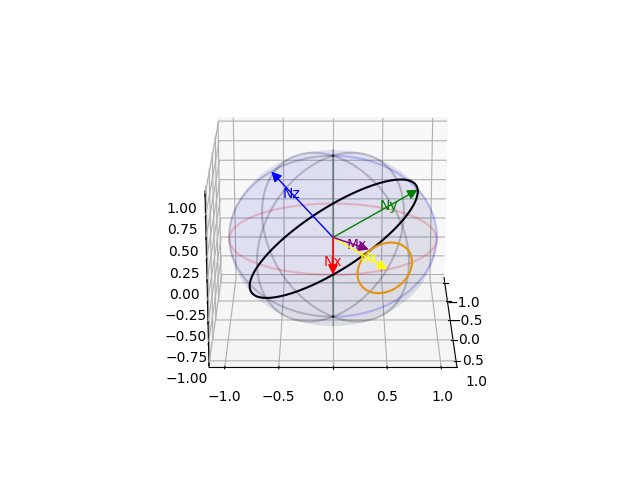

[1.0, 0.0, -0.0] [0.0, 0.8090169943749475, 0.5877852522924731]


In [9]:
m_val = {'theta': math.pi / 5, 'R': 0.3}
m_val['psi'] = float(psi_alt.subs(m_val))

r = Ux.angle_to(Mx)

with GlobePlotMpl() as gpl :
    gpl.add_point(Nx.subs(m_val), 'Nx', 'r')
    gpl.add_point(Ny.subs(m_val), 'Ny', 'g')
    gpl.add_point(Nz.subs(m_val), 'Nz', 'b')
    gpl.add_great_circle(Nz.subs(m_val), 'k')
    gpl.add_circle(Ux.subs(m_val), float(r.subs(m_val)), 'orange')
    gpl.add_point(Ux.subs(m_val), 'Ux', 'yellow')
    gpl.add_point(Mx.subs(m_val), 'Mx', 'purple')

## Calcul complet

Les points $A$ et $B$ sont séparés d'un angle $\alpha$ donné. On cherche $\theta$ mais également $\psi_a$ et $\psi_b$, leur position respective.

In [10]:
theta, psi_a, psi_b, Ra, Rb, alpha = sympy.symbols('theta psi_a psi_b R_a R_b alpha')

In [11]:
Ua = g3d.Vector(sympy.cos(-psi_a), sympy.sin(-psi_a), 0)
Ub = g3d.Vector(sympy.cos(psi_b), sympy.sin(psi_b), 0)

In [12]:
Ma = Ua.project(Nz)
Mb = Ub.project(Nz)

On récupère la solution précédemment calculée pour $\psi$. Et pour éviter de perdre le solveur on remplace le numérateur par $P_a$ et $P_b$.

In [13]:
Pa, Pb = sympy.symbols('P_a P_b')

psi_a_sol = sympy.asin(Pa / sympy.sin(theta))
psi_b_sol = sympy.asin(Pb / sympy.sin(theta))

In [14]:
theta_equ = (psi_a_sol + psi_b_sol) - alpha
theta_equ

-alpha + asin(P_a/sin(theta)) + asin(P_b/sin(theta))

In [15]:
# theta_sol = sympy.solve(theta_equ, theta) # sympy can not solve this, matlab was used

In [22]:
s3 = Pa**4 - 2 * sympy.cos(2*alpha) * Pa**2 * Pb**2 + Pb**4

In [16]:
s4 = 2 * Pa * Pb**3 * sympy.sin(alpha)**2 * sympy.cos(alpha)
s5 = Pa**2 + Pb**2 * sympy.sin(alpha)**2 - Pb**2

s6 = Pa**4 - Pb**4*sympy.sin(alpha)**2 + Pb**4 - 2*Pa**2*Pb**2 + 3*Pa**2*Pb**2*sympy.sin(alpha)**2 + s4
s7 = (s6 / s3) # sympy can not simplify this, matlab was used

s7

(P_a**4 + 3*P_a**2*P_b**2*sin(alpha)**2 - 2*P_a**2*P_b**2 + 2*P_a*P_b**3*sin(alpha)**2*cos(alpha) - P_b**4*sin(alpha)**2 + P_b**4)/(P_a**4 - 2*P_a**2*P_b**2*cos(2*alpha) + P_b**4)

In [17]:
s7 = (Pa + Pb*sympy.cos(alpha))**2/(Pa**2 + 2*sympy.cos(alpha)*Pa*Pb + Pb**2)
s7

(P_a + P_b*cos(alpha))**2/(P_a**2 + 2*P_a*P_b*cos(alpha) + P_b**2)

In [18]:
s8 = s5  / (sympy.sin(alpha) * (Pa - Pb*sympy.cos(alpha)) * sympy.sqrt(s7))
s8

(P_a**2 + P_b**2*sin(alpha)**2 - P_b**2)/(sqrt((P_a + P_b*cos(alpha))**2/(P_a**2 + 2*P_a*P_b*cos(alpha) + P_b**2))*(P_a - P_b*cos(alpha))*sin(alpha))

In [19]:
theta_alt = sympy.asin(s8.simplify().subs({'P_a': sympy.sin(Ra), 'P_b': sympy.sin(Rb)}))
theta_alt

asin((sin(R_a)/sin(alpha) + sin(R_b)/tan(alpha))/sqrt((sin(R_a) + sin(R_b)*cos(alpha))**2/(sin(R_a)**2 + 2*sin(R_a)*sin(R_b)*cos(alpha) + sin(R_b)**2)))

In [20]:
m_val = {'R_a': 0.2, 'R_b': 0.3, 'alpha': 0.7}
m_val['theta'] = float(theta_alt.subs(m_val))
m_val['psi_a'] = float(sympy.asin(sympy.sin(Ra) / sympy.sin(theta)).subs(m_val))
m_val['psi_b'] = float(sympy.asin(sympy.sin(Rb) / sympy.sin(theta)).subs(m_val))
print(m_val)

{'R_a': 0.2, 'R_b': 0.3, 'alpha': 0.7, 'theta': 0.8073380151627267, 'psi_a': 0.27858366636784426, 'psi_b': 0.42141633363215564}


<IPython.core.display.Javascript object>


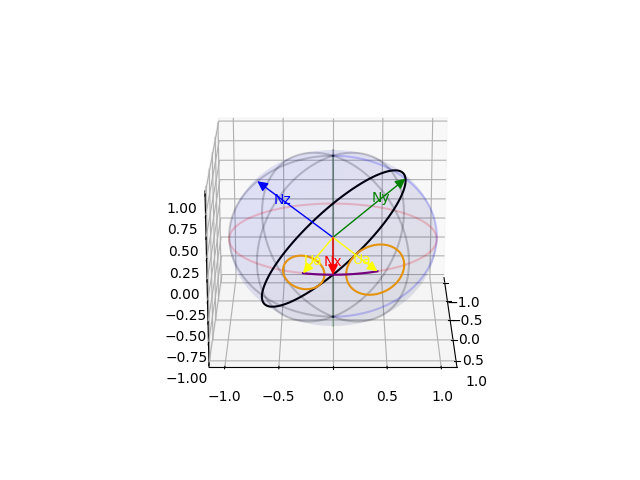

[1.0, 0.0, -0.0] [0.0, 0.6914240292028893, 0.7224491759569265]


In [21]:
with GlobePlotMpl() as gpl :
    gpl.add_point(Nx.subs(m_val), 'Nx', 'r')
    gpl.add_point(Ny.subs(m_val), 'Ny', 'g')
    gpl.add_point(Nz.subs(m_val), 'Nz', 'b')
    gpl.add_great_circle(Nz.subs(m_val), 'k')
    gpl.add_point(Ua.subs(m_val), 'Ua', 'yellow')
    gpl.add_point(Ub.subs(m_val), 'Ua', 'yellow')
    gpl.add_circle(Ua.subs(m_val), float(Ra.subs(m_val)), 'orange')
    gpl.add_circle(Ub.subs(m_val), float(Rb.subs(m_val)), 'orange')
    gpl.add_line(Ua.subs(m_val), Ub.subs(m_val), 'purple')